## Concurrency and async / await:

- Details about the async def syntax for path operation functions and some background about asynchronous code, concurrency, and parallelism.
- Modern versions of Python have support for "asynchronous code" using something called "coroutines", with async and await syntax.

Let's see that phrase by parts in the sections below:

- Asynchronous Code
- async and await
- Coroutines

In [ ]:
# If you are using third party libraries that tell you to call them with await, like:
results = await some_library()

## Asynchronous Code:- 
- Asynchronous code just means that the language 💬 has a way to tell the computer / program 🤖 that at some point in the code, it 🤖 will have to wait for something else to finish somewhere else. Let's say that something else is called "slow-file" 
- So, during that time, the computer can go and do some other work, while "slow-file" 📝 finishes.

- That "wait for something else" normally refers to I/O operations that are relatively "slow" (compared to the speed of the processor and the RAM memory), like waiting for:

* the data from the client to be sent through the network
* the data sent by your program to be received by the client through the network
* the contents of a file in the disk to be read by the system and given to your program
* the contents your program gave to the system to be written to disk
* a remote API operation
* a database operation to finish
* a database query to return the results
* etc.
* As the execution time is consumed mostly by waiting for I/O operations, they call them "I/O bound" operations.

### Concurrency and Burgers¶

- This idea of asynchronous code described above is also sometimes called "concurrency". It is different from "parallelism".

- Concurrency and parallelism both relate to "different things happening more or less at the same time".

- But the details between concurrency and parallelism are quite different.

#### Is concurrency better than parallelism?
Nope! That's not the moral of the story.

- Concurrency is different than parallelism. And it is better on specific scenarios that involve a lot of waiting. Because of that, it generally is a lot better than parallelism for web application development. But not for everything.

#### Concurrency + Parallelism: Web + Machine Learning¶
With FastAPI you can take advantage of concurrency that is very common for web development (the same main attraction of NodeJS).

But you can also exploit the benefits of parallelism and multiprocessing (having multiple processes running in parallel) for CPU bound workloads like those in Machine Learning systems.

That, plus the simple fact that Python is the main language for Data Science, Machine Learning and especially Deep Learning, make FastAPI a very good match for Data Science / Machine Learning web APIs and applications (among many others).

#### async and await
- Modern versions of Python have a very intuitive way to define asynchronous code. This makes it look just like normal `sequential` code and do the `awaiting` for you at the right moments.

- When there is an operation that will require waiting before giving the results and has support for these new Python features, you can code it like:

`burgers = await get_burgers(2)`

- The key here is the await. It tells Python that it has to wait ⏸ for get_burgers(2) to finish doing its thing 🕙 before storing the results in burgers. With that, Python will know that it can go and do something else 🔀 ⏯ in the meanwhile (like receiving another request).

- For await to work, it has to be inside a function that supports this `asynchronicity`. To do that, you just declare it with async def:

`async def get_burgers(number: int):`

    # Do some asynchronous stuff to create the burgers

    `return burgers`



In [ ]:
@app.get('/burgers')
async def read_burgers():
    burgers = await get_burgers(2)
    return burgers

- 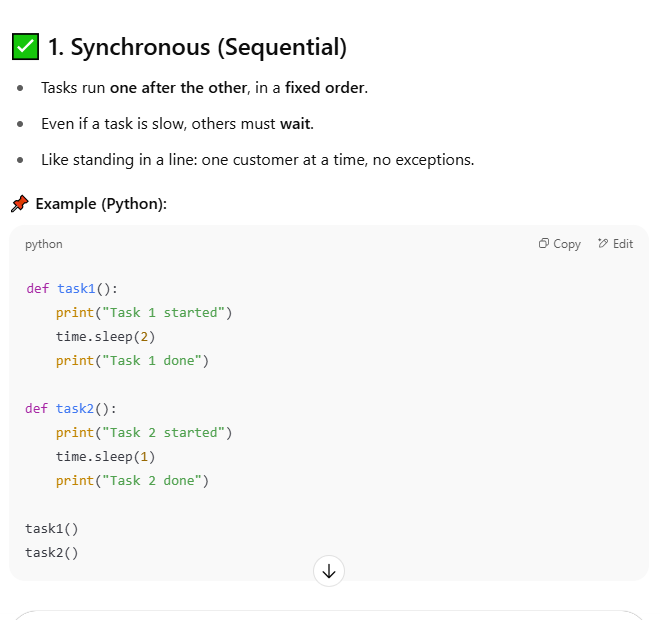
- 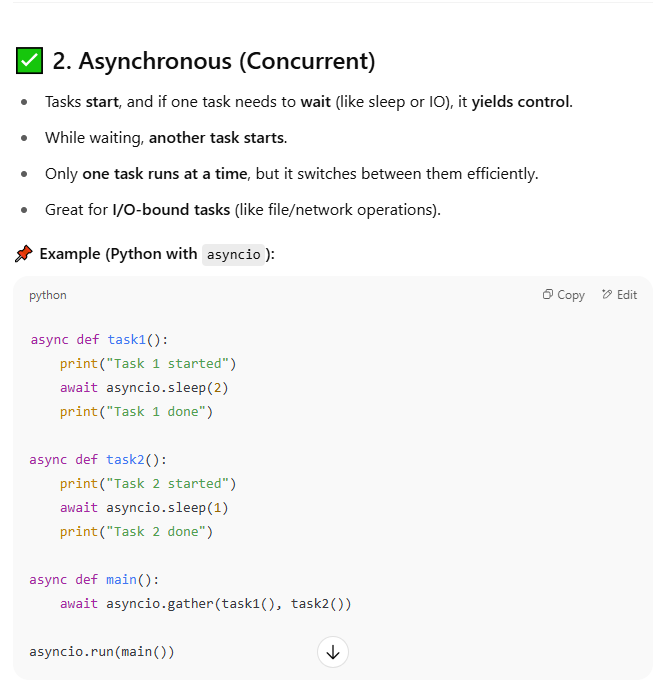
- 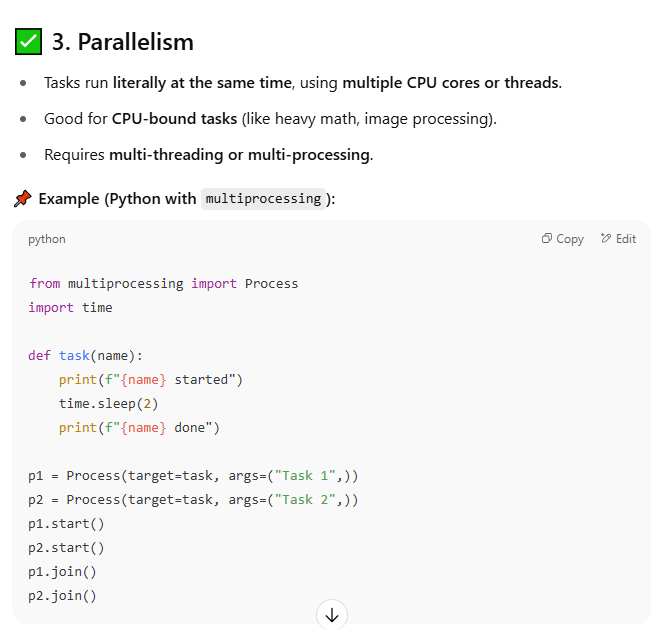
- 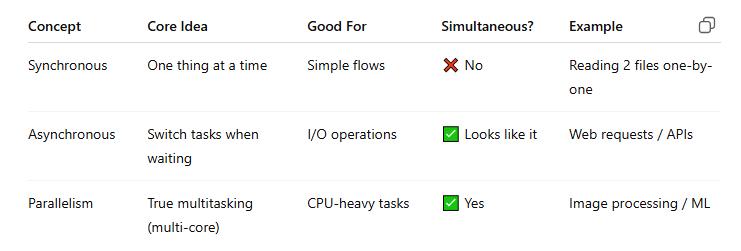

- 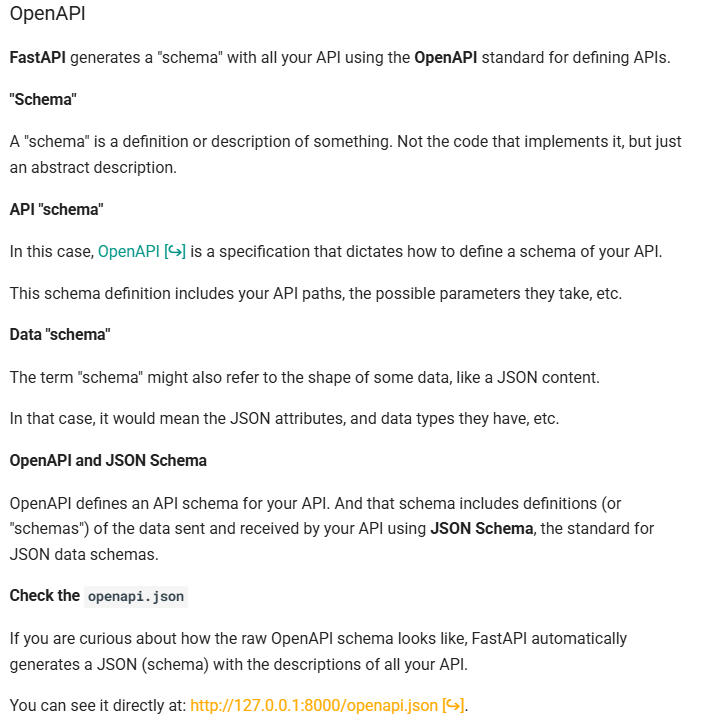

- 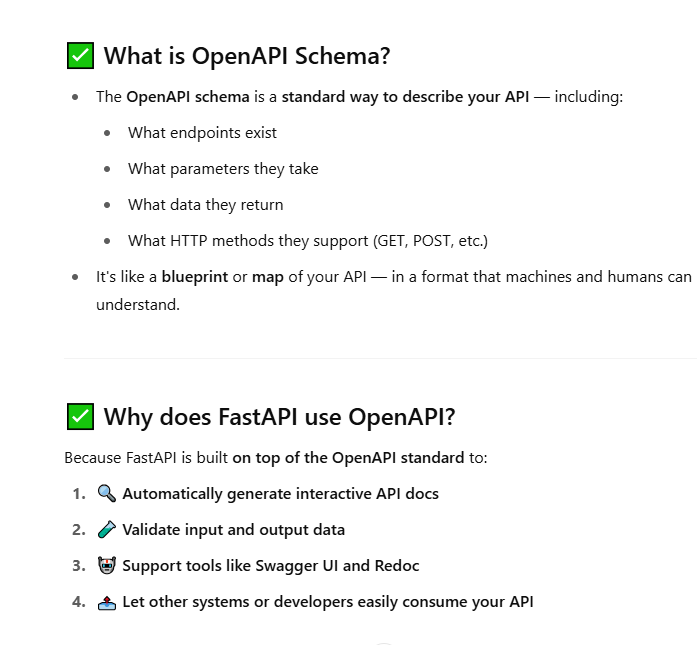

In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def root():
    return {"message": "Hello World"}

- `FastAPI` is a Python class that provides all the functionality for your API.

- `FastAPI` is a class that inherits directly from `Starlette.`

- The @app.get("/") tells FastAPI that the function right below is in charge of handling requests that go to:

the `path` `/`

using a `get` operation

@`decorator` Info

That @something syntax in Python is called a "`decorator`".

You put it on top of a function. Like a pretty decorative hat (I guess that's where the term came from).

A "`decorator`" takes the function below and does something with it.

In our case, this `decorator` tells FastAPI that the function below corresponds to the path / with an operation get.

It is the "path operation `decorator`".

You are free to use each operation (HTTP method) as you wish.

FastAPI doesn't enforce any specific meaning.

The information here is presented as a guideline, not a requirement.

For example, when using **`GraphQL`** you normally perform all the actions using only `POST` operations.

**Step 1**: import FastAPI

`from fastapi import FastAPI`

**Step 2**: create a FastAPI "instance"

`app = FastAPI()`

    - Here the app variable will be an "instance" of the class FastAPI.

    - This will be the main point of interaction to create all your API.

**Step 3**: create a path operation

`@app.get("/")`

**Step 4:** define the path operation function

This is our `path operation function`:

`path`: is /.

`operation`: is get.

`function`: is the function below the "decorator" (below @app.get("/")).

**Step 5:** return the content

    `return {"message": "Hello World"}`

## Path Parameters

### Enumeration or Enum

**What is Enumeration in Python?** 
- Enumeration (Enum) is a way to define a set of named constant values.

- Instead of using raw values like "red" or 1, you give them meaningful names.

- Makes your code more readable, organized, and less error-prone.

**Why use Enumeration?** 
- Avoid magic numbers/strings in code

- Make code self-documenting — names describe purpose

- Prevent invalid values — restrict to only the defined options

- Easy comparisons — works like constants, but safer

**Enumeration is a way to define a fixed set of named constants so your code is clear, safe, and avoids magic values.**


- 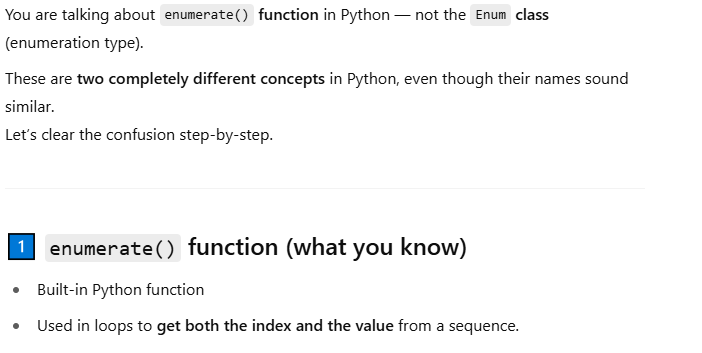

- 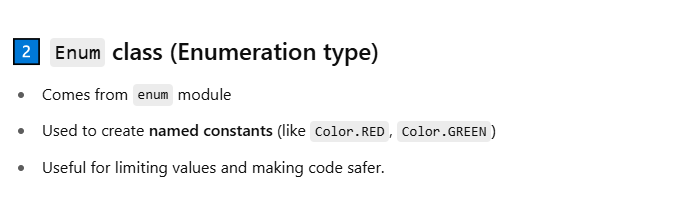


In [1]:
from enum import Enum

class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

# Using Enum
color = Color.RED

if color == Color.RED:
    print("Stop")  # ✅ Safe and clear


Stop


In [2]:
Color.RED

<Color.RED: 1>

`"If I just write a normal Python class with constants instead of inheriting from Enum, I get the same result. So what’s the point of using Enum?"`

**Let’s compare traditional `class constants` vs `Enum` to see the advantages.**

In [7]:
# 1️⃣ Your Enum version
from enum import Enum

class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

print(Color.RED)       # Color.RED
print(Color.RED.value) # 1

Color.RED
1


✅ Advantages:

- Enforces that only defined members exist (Color.YELLOW will cause an error).

- Members are unique and immutable (can’t change Color.RED = 5 later).

- You can loop through all members easily.

- Members are comparable only to other members of the same Enum.

- Works great with FastAPI, Pydantic, type hints — validation is automatic.

In [13]:
# 2️⃣ Traditional class constants
class Color:
    RED = 1
    GREEN = 2
    BLUE = 3

print(Color.RED)  # 1

1


- 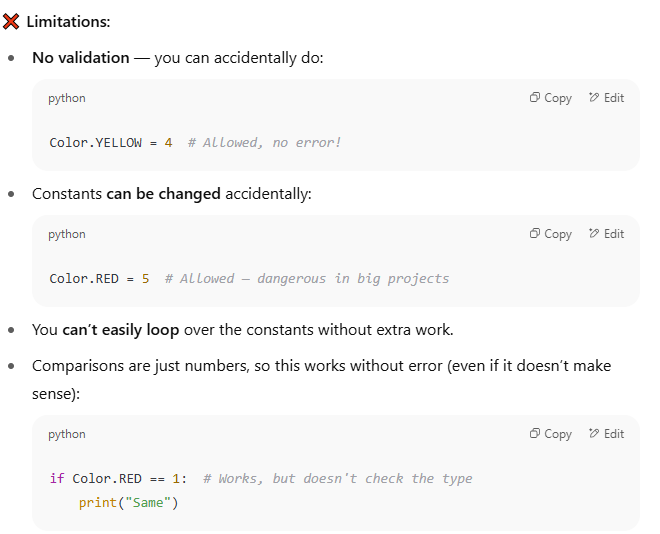

In [15]:
Color.RED = 5

In [16]:
Color.RED

5

- 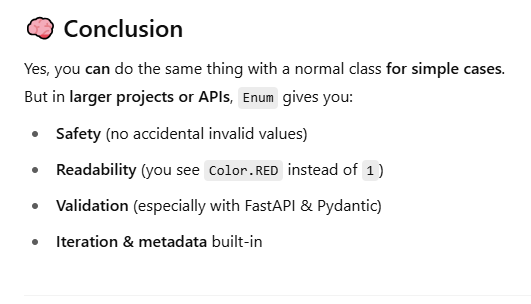

## query parameter

- https://fastapi.tiangolo.com/tutorial/query-params/

## request body

- When you need to send data from a **`client (let's say, a browser) to your API`**, you send it as a request body.

- A request body is data sent by the **`client to your API`**. A response body is the data your **`API sends to the client`**.

- **`Your API almost always has to send a response body`**. But `clients don't necessarily need to send request bodies all the time`, sometimes they only request a `path`, maybe with some `query parameters`, but don't send a body.

**To send data, you should use one of: `POST (the more common), PUT, DELETE or PATCH.`**

- Sending a body with a GET request has an undefined behavior in the specifications, nevertheless, it is supported by FastAPI, only for very complex/extreme use cases.

- As it is discouraged, the interactive docs with Swagger UI won't show the documentation for the body when using GET, and proxies in the middle might not support it.

### Request body + path parameters
- You can declare path parameters and request body at the same time.

- FastAPI will recognize that the function parameters that match path parameters should be taken from the path, and that function parameters that are declared to be Pydantic models should be taken from the request body.

- 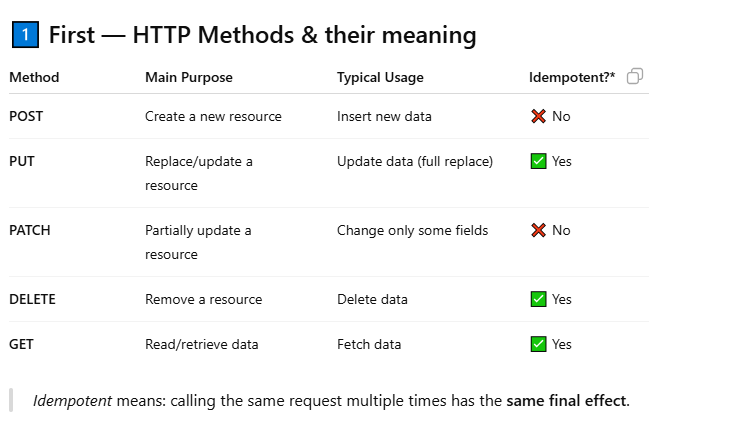

## Query Parameters and String Validations

**`FastAPI allows you to declare additional information and validation for your parameters.`** 
- "GET /items/?q=Rajkumar HTTP/1.1"

In [1]:
{"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}

{'items': [{'item_id': 'Foo'}, {'item_id': 'Bar'}]}

In [3]:
a = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}

In [6]:
a.items(), a.values(), a.keys()

(dict_items([('items', [{'item_id': 'Foo'}, {'item_id': 'Bar'}])]),
 dict_values([[{'item_id': 'Foo'}, {'item_id': 'Bar'}]]),
 dict_keys(['items']))

In [16]:
# from fastapi import FastAPI

# app = FastAPI()


# @app.get("/items/")
# async def read_items(q: str | None = None):
#     results = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}
#     if q:
#         results.update({"q": q})
#     return results

The query parameter q is of type str | None, that means that it's of type str but could also be None, and indeed, the default value is None, so FastAPI will know it's not required.
- FastAPI will know that the value of q is not required because of the default value = None.

- Having str | None will allow your editor to give you better support and detect errors.

#### Additional validation

- We are going to enforce that even though `q` is optional, whenever it is provided, its length doesn't exceed 50 characters.

Import `Query` and `Annotated`

To achieve that, first import:

`Query` from fastapi

`Annotated` from typing

**Use `Annotated` in the type for the `q` parameter**
- Remember I told you before that Annotated can be used to add metadata to your parameters in the Python Types Intro?

- Now it's the time to use it with FastAPI. 🚀

q: str | None = None

In [ ]:
from typing import Annotated

from fastapi import FastAPI, Query

app = FastAPI()


@app.get("/items/")
async def read_items(q: Annotated[str | None, Query(max_length=50)] = None):
    results = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}
    if q:
        results.update({"q": q})
    return results

Notice that the default value is still None, so the parameter is still optional.

- But now, having **Query(max_length=50)** inside of `Annotated`, we are telling FastAPI that we want it to have additional validation for this value, we want it to have maximum 50 characters. 😎

- Here we are using `Query()` because this is a `query parameter`. Later we will see others like `Path(), Body(), Header(), and Cookie(),` that also accept the same arguments as `Query()`.



**`FastAPI will now:`**

- Validate the data making sure that the max length is 50 characters
- Show a clear error for the client when the data is not valid
- Document the parameter in the OpenAPI schema path operation (so it will show up in the automatic docs UI)

#### Alternative (old): Query as the default value
- Previous versions of FastAPI (before 0.95.0) required you to use Query as the default value of your parameter, instead of putting it in Annotated, there's a high chance that you will see code using it around, so I'll explain it to you.

- For new code and whenever possible, use Annotated as explained above. There are multiple advantages (explained below) and no disadvantages. 🍰

In [ ]:
from fastapi import FastAPI, Query

app = FastAPI()


@app.get("/items/")
async def read_items(q: str | None = Query(default=None, max_length=50)):
    results = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}
    if q:
        results.update({"q": q})
    return results

**`Query` as the default value or in `Annotated`**:- 

- Keep in mind that when using `Query` inside of `Annotated` you cannot use the `default` parameter for `Query`.
- Instead, use the actual `default value` of the function parameter. Otherwise, it would be inconsistent.
  
- 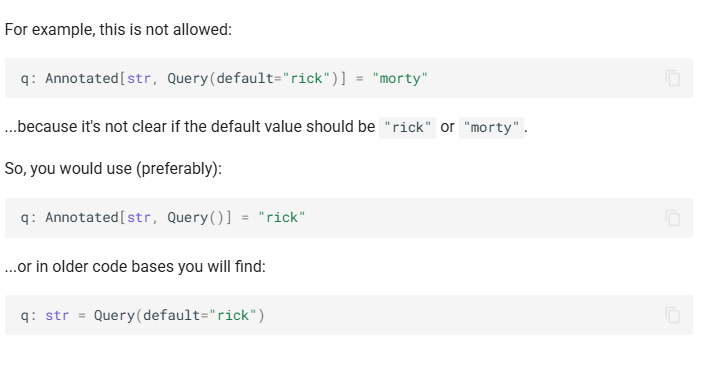


#### Advantages of `Annotated`:- 
- Using Annotated is recommended instead of the `default` value in function parameters, it is better for multiple reasons. 🤓

- The default value of the function parameter is the actual default value, that's more intuitive with Python in general. 😌

- You could call that same function in other places without FastAPI, and it would work as expected. If there's a required parameter (without a default value), your editor will let you know with an error, Python will also complain if you run it without passing the required parameter.

- When you don't use Annotated and instead use the (old) default value style, if you call that function without FastAPI in other places, you have to remember to pass the arguments to the function for it to work correctly, otherwise the values will be different from what you expect (e.g. QueryInfo or something similar instead of str). And your editor won't complain, and Python won't complain running that function, only when the operations inside error out.

- Because Annotated can have more than one metadata annotation, you could now even use the same function with other tools, like


#### Add more validations

**Add regular expressions**

In [ ]:
from typing import Annotated

from fastapi import FastAPI, Query

app = FastAPI()


@app.get("/items/")
async def read_items(
    q: Annotated[
        str | None, Query(min_length=3, max_length=50, pattern="^fixedquery$")
    ] = None,
):
    results = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}
    if q:
        results.update({"q": q})
    return results

- This specific regular expression pattern checks that the received parameter value:

- ^: starts with the following characters, doesn't have characters before.
- fixedquery: has the exact value fixedquery.
- $: ends there, doesn't have any more characters after fixedquery.

**`Pydantic v1` `regex` instead of pattern:-** 

- Before `Pydantic version 2` and before FastAPI 0.100.0, the `parameter` was called `regex` instead of `pattern`, but it's now deprecated.

In [ ]:
from typing import Annotated

from fastapi import FastAPI, Query

app = FastAPI()


@app.get("/items/")
async def read_items(
    q: Annotated[
        str | None, Query(min_length=3, max_length=50, regex="^fixedquery$")
    ] = None,
):
    results = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}
    if q:
        results.update({"q": q})
    return results

But know that this is deprecated and it should be updated to use the new parameter `pattern`. 🤓

**Default values:-**

- You can, of course, use default values other than None.

- Let's say that you want to declare the `q` query parameter to have a `min_length` of 3, and to have a default value of "`fixedquery`":

In [ ]:
from typing import Annotated

from fastapi import FastAPI, Query

app = FastAPI()


@app.get("/items/")
async def read_items(q: Annotated[str, Query(min_length=3)] = "fixedquery"):
    results = {"items": [{"item_id": "Foo"}, {"item_id": "Bar"}]}
    if q:
        results.update({"q": q})
    return results  

- Having a default value of any type, including `None`, makes the `parameter optional` (not required).

#### Required parameters

- When we don't need to declare more validations or metadata, we can make the q query parameter required just by not declaring a default value, like: